# 📊 YouTube Video Performance Analysis

Welcome to the YouTube Video Performance Analysis project. In this notebook, we will explore real-world YouTube video data, perform in-depth exploratory data analysis (EDA), build a predictive model to estimate revenue, and extract insights for content optimization.


## 📦 Step 1: Import Libraries


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib
import isodate
import warnings
warnings.filterwarnings('ignore')

## 📁 Step 2: Load the Dataset
- Display basic information about the data.
- Check for null values in the dataset.
- Preview of dataset

In [28]:
data = pd.read_csv("data/youtube_channel_data.csv")
print(data.info())
print(data.isnull().sum())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


## 🧹 Step 3: Data Cleaning
- Check for null values
- Drop rows with missing data

In [ ]:
print("Missing values:\n", data.isnull().sum())

data = data.dropna()

Missing values:
 ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


## 📊 Step 4: Exploratory Data Analysis (EDA)
- Visualize relationships
- Revenue distribution
- Top Performers by Revenue
- Views vs Revenue
- Heatmap of correlations


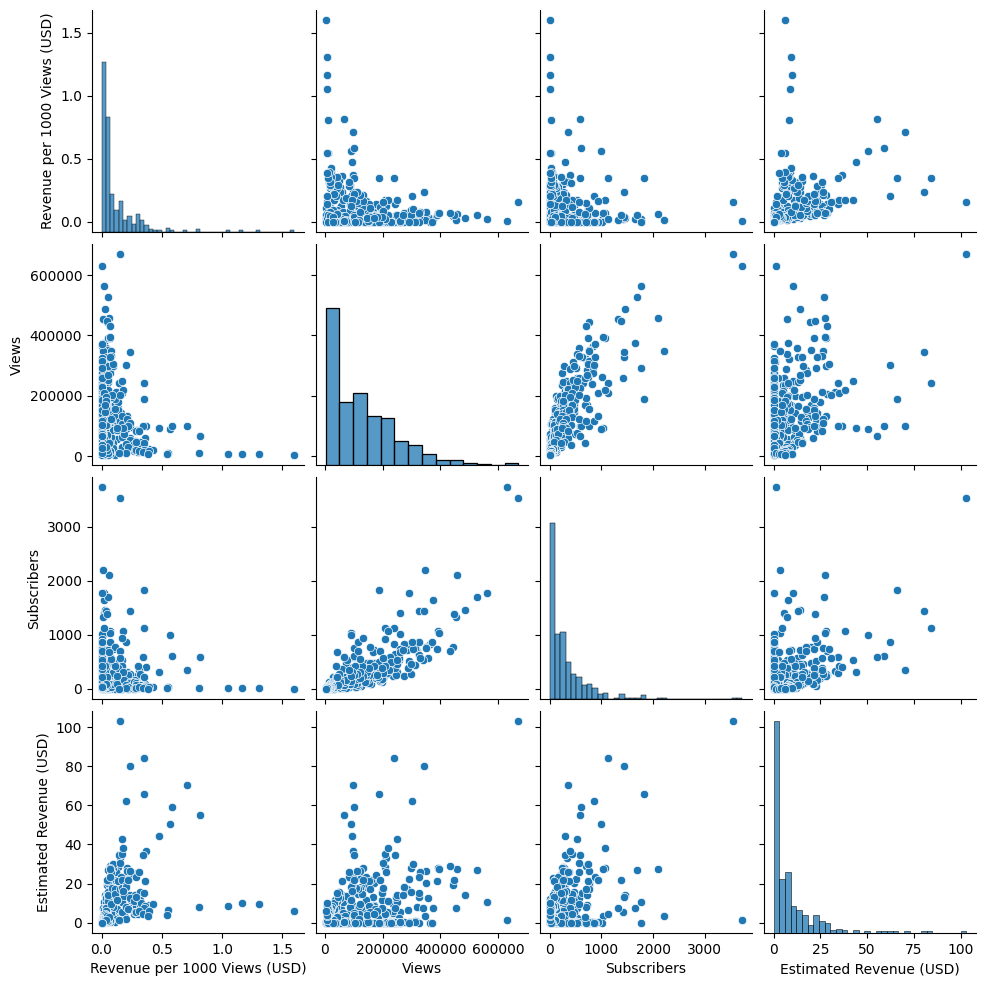

In [29]:
# Pairplot to visualize relationships
sns.pairplot(data[['Revenue per 1000 Views (USD)', 'Views',
'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

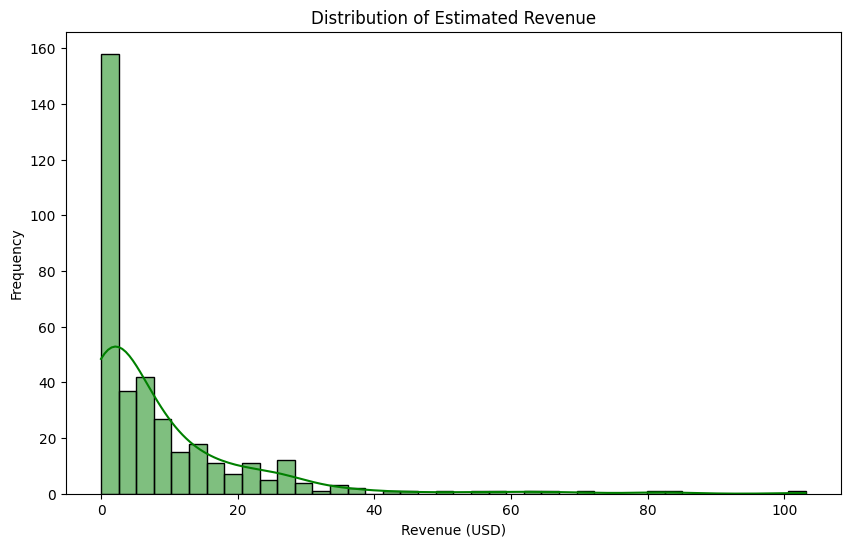

In [ ]:
#Total estimated revenue distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Estimated Revenue (USD)'], bins=40, kde=True, color='green')
plt.title("Distribution of Estimated Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

In [31]:
#Top 10 videos by estimated revenue
top_videos = data.sort_values(by='Estimated Revenue (USD)',
ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views',
'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


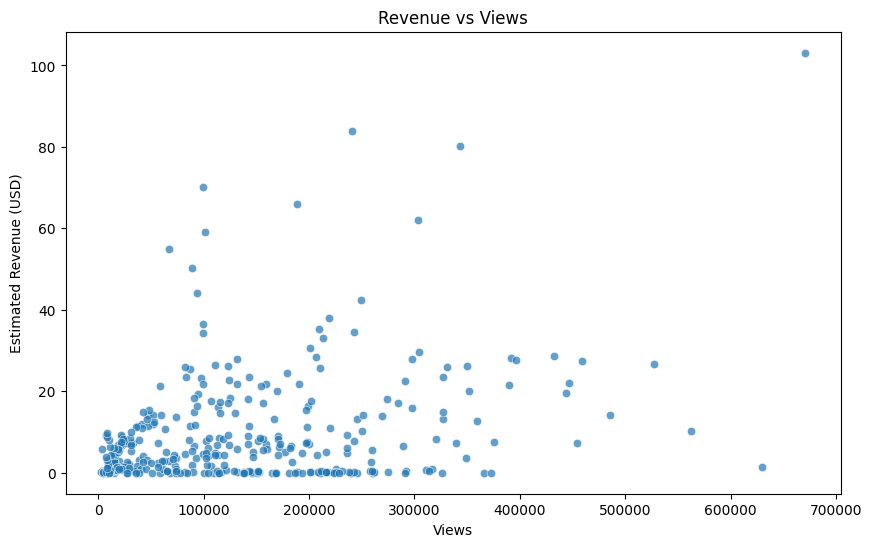

In [25]:
# Revenue vs Views
plt.figure(figsize=(10,6))
sns.scatterplot(x='Views', y='Estimated Revenue (USD)', data=data, alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


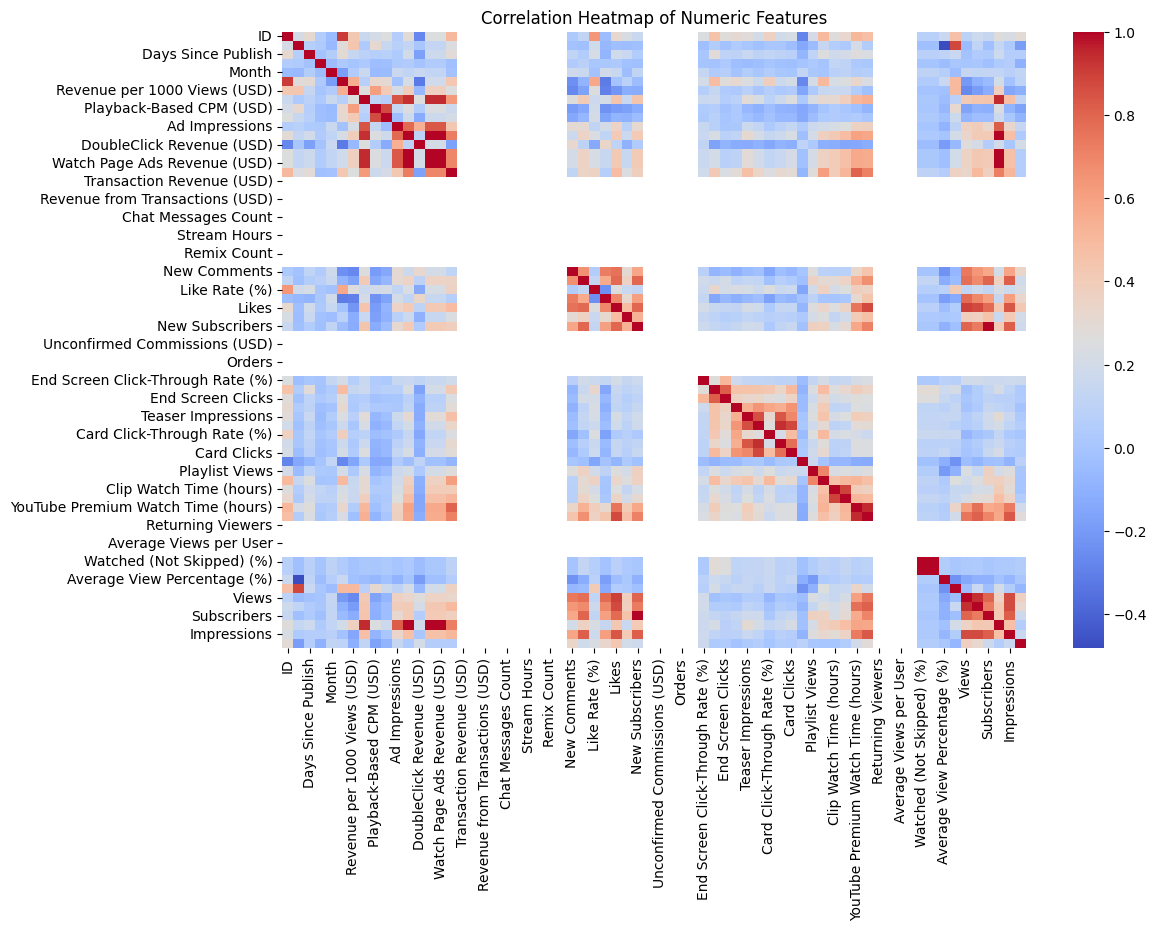

In [27]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(12,8))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## ⚙️ Step 5: Feature Engineering


In [33]:
# Revenue per View
data['Revenue per View'] = data['Estimated Revenue (USD)'] / data['Views']

# Engagement Rate
data['Engagement Rate'] = (data['Likes'] + data['Shares'] + data['New Comments']) / data['Views'] * 100

## 🤖 Step 6: Predictive Modeling - Estimate Revenue
- Train a Random Forest Regressor
- Evaluate the model


In [ ]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 75.70
R² Score: 0.13


## 📌 Step 7: Feature Importance


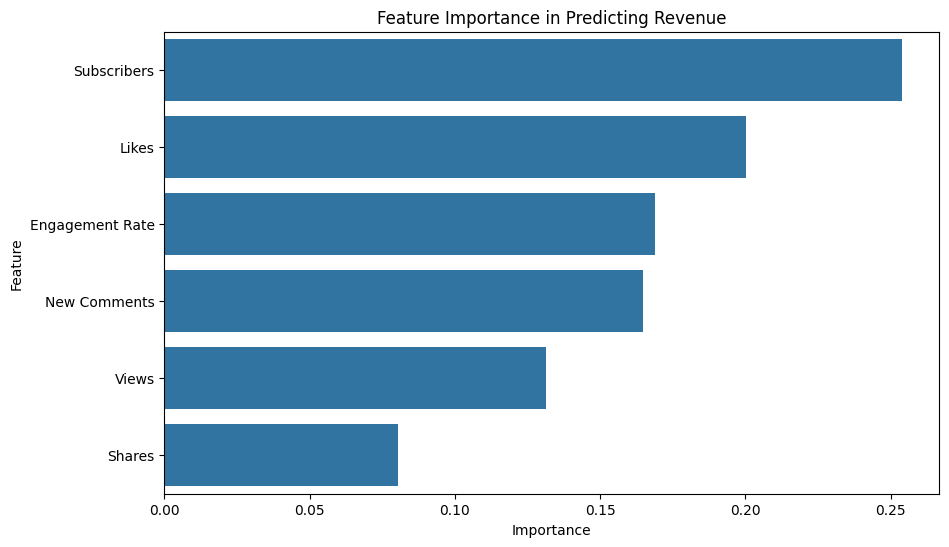

In [ ]:
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Predicting Revenue")
plt.show()

## 💾 Step 8: Save the Trained Model


In [39]:
joblib.dump(model, 'youtube_revenue_predictor.pkl')
print("Model saved as 'youtube_revenue_predictor.pkl'")

Model saved as 'youtube_revenue_predictor.pkl'


## 🧠 Step 9: Key Insights & Takeaways

- Views and Engagement Rate have the highest impact on revenue.
- Videos with more shares, likes, and comments tend to perform better monetarily.
- Content creators should focus on improving video quality and engaging thumbnails to boost CTR and retention.

---
